In [ ]:
# %pip freeze > requirements.txt
# %pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


# 1. Initiation


#### 1.1 Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import stats

#### 1.2 Importing Daataset




In [ ]:
Dataset = pd.read_csv('Dataset for PMV Prediction.csv')
print(Dataset)

       Season            Climate  Building type   Clo  Met  \
0      Summer  Humid subtropical         Office  0.57  1.0   
1      Summer  Humid subtropical         Office  0.57  1.1   
2      Summer  Humid subtropical         Office  0.57  1.1   
3      Summer  Humid subtropical         Office  0.57  1.0   
4      Summer  Humid subtropical         Office  0.57  1.0   
...       ...                ...            ...   ...  ...   
47331  Winter  Humid subtropical  Senior center  0.94  1.0   
47332  Winter  Humid subtropical  Senior center  0.66  1.0   
47333  Winter  Humid subtropical  Senior center  0.69  1.0   
47334  Winter  Humid subtropical  Senior center  0.82  1.0   
47335  Winter  Humid subtropical  Senior center  0.86  1.2   

       Air temperature (C)  Relative humidity (%)  Air velocity (m/s)  \
0                     24.3                   36.8                0.27   
1                     25.7                   33.1                0.09   
2                     24.6          

#### 1.4 Dealing with Outliars

In [4]:
# Step 1: Remove Outliers using Z-scores
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))  # Only numeric columns
    outliers = (z_scores > threshold).any(axis=1)
    print(f"Number of outliers detected: {outliers.sum()}")
    return df[~outliers]

# Step 2: Apply outlier removal
Dataset = remove_outliers_zscore(Dataset)

# Step 3: Dataset is now ready for any machine learning model
print(f"Shape of the Dataset after cleaning: {Dataset.shape}")

Number of outliers detected: 3071
Shape of the Dataset after cleaning: (44265, 10)


#### 1.3 Max and Min Values of Variables

In [5]:
# Print the max and min value of every variable after removing outliers
max_values = Dataset.max()  # Maximum values of each column
min_values = Dataset.min()  # Minimum values of each column

# Printing the results
print("Maximum values of each variable after removing outliers:")
print(max_values)

print("\nMinimum values of each variable after removing outliers:")
print(min_values)

Maximum values of each variable after removing outliers:
Season                                                        Winter
Climate                                Warm-summer humid continental
Building type                                          Senior center
Clo                                                             1.53
Met                                                              1.8
Air temperature (C)                                             34.1
Relative humidity (%)                                           89.0
Air velocity (m/s)                                              1.51
Outdoor monthly air temperature (C)                             38.1
PMV                                                              2.7
dtype: object

Minimum values of each variable after removing outliers:
Season                                         Autumn
Climate                                Cold semi-arid
Building type                               Classroom
Clo                

#### 1.4 Input and Output Features

In [6]:
print (Dataset.shape)

(44265, 10)


In [7]:
# Input and Output Features
X = Dataset.drop("PMV", axis=1)
y = Dataset["PMV"]                    # Output Features

In [8]:
print(X)

       Season            Climate  Building type   Clo  Met  \
0      Summer  Humid subtropical         Office  0.57  1.0   
1      Summer  Humid subtropical         Office  0.57  1.1   
2      Summer  Humid subtropical         Office  0.57  1.1   
3      Summer  Humid subtropical         Office  0.57  1.0   
4      Summer  Humid subtropical         Office  0.57  1.0   
...       ...                ...            ...   ...  ...   
47331  Winter  Humid subtropical  Senior center  0.94  1.0   
47332  Winter  Humid subtropical  Senior center  0.66  1.0   
47333  Winter  Humid subtropical  Senior center  0.69  1.0   
47334  Winter  Humid subtropical  Senior center  0.82  1.0   
47335  Winter  Humid subtropical  Senior center  0.86  1.2   

       Air temperature (C)  Relative humidity (%)  Air velocity (m/s)  \
0                     24.3                   36.8                0.27   
1                     25.7                   33.1                0.09   
2                     24.6          

In [9]:
# -----------------------------
# Identify feature types
# -----------------------------
categorical_features = ["Season", "Building type","Climate"]
numeric_features = [
    "Clo", "Met", "Air temperature (C)", "Relative humidity (%)",
    "Air velocity (m/s)","Outdoor monthly air temperature (C)"
]

In [10]:
# Preprocessor: Scale numeric + One-hot encode categorical
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer 

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

#### 1.5 Split the Dataset: Train, Validation, and Test

In [11]:
#### 1.6 Split the Dataset: Train, Validation, and Test
# Split raw first
from sklearn.model_selection import train_test_split
X_train_raw, X_temp_raw, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val_raw, X_test_raw, y_val, y_test = train_test_split(X_temp_raw, y_temp, test_size=0.5, random_state=0)

#### 1.6 Data Scaling : Standardization

In [12]:
# Fit preprocessor only on training set
preprocessor.fit(X_train_raw)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Clo', 'Met', 'Air temperature (C)',
                                  'Relative humidity (%)', 'Air velocity (m/s)',
                                  'Outdoor monthly air temperature (C)']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Season', 'Building type', 'Climate'])])

In [13]:
# Transform all splits
X_train = preprocessor.transform(X_train_raw)
X_val = preprocessor.transform(X_val_raw)
X_test = preprocessor.transform(X_test_raw)

In [14]:
print (X_train)

[[-1.28948584 -0.02551972  1.24761483 ...  0.          0.
   0.        ]
 [ 1.53088191 -0.02551972 -0.69078384 ...  0.          0.
   0.        ]
 [-0.98575393 -0.02551972  1.59375745 ...  0.          0.
   0.        ]
 ...
 [ 0.22917372 -0.02551972 -0.69078384 ...  0.          0.
   1.        ]
 [ 0.22917372 -0.02551972 -0.48309827 ...  0.          0.
   1.        ]
 [ 0.01222235 -1.27416127  0.90147221 ...  1.          0.
   0.        ]]


In [15]:
print (X_test)

[[ 1.44410137 -0.02551972  0.93608647 ...  0.          0.
   0.        ]
 [-1.28948584 -0.02551972  1.90528581 ...  0.          0.
   0.        ]
 [ 0.01222235 -1.27416127  0.7284009  ...  0.          0.
   0.        ]
 ...
 [ 0.35934454 -0.64984049 -1.72921171 ...  0.          0.
   0.        ]
 [ 0.31595427 -0.02551972 -0.76001237 ...  0.          1.
   0.        ]
 [-0.29150956 -1.27416127  1.66298598 ...  0.          0.
   0.        ]]


In [16]:
print (X_val)

[[ 0.0990029  -0.64984049 -0.20618417 ...  0.          0.
   0.        ]
 [ 0.88002782 -0.02551972 -0.79462663 ...  0.          0.
   0.        ]
 [ 0.22917372  1.22312183 -0.96769794 ...  0.          0.
   0.        ]
 ...
 [-0.5518512  -0.02551972 -0.03311286 ...  0.          0.
   0.        ]
 [ 1.53088191 -0.64984049 -0.48309827 ...  0.          0.
   0.        ]
 [-1.0291442   3.09608415  0.52071533 ...  1.          0.
   0.        ]]


In [17]:
print (y_train)

7630     0.4
19461    0.5
36408    1.2
13148    0.2
16051   -0.7
        ... 
31729    0.3
22185   -0.8
45599   -0.1
46553    0.1
2788     0.4
Name: PMV, Length: 35412, dtype: float64


In [18]:
print (y_test)

23371    1.1
36322    1.6
5683     0.5
36942   -0.8
4805     1.0
        ... 
25079    0.1
38531    0.3
13513   -0.8
33690   -0.1
3376     1.1
Name: PMV, Length: 4427, dtype: float64


In [19]:
print (y_val)

25573   -0.1
32146    0.2
17678   -0.1
9815     0.4
26853   -0.9
        ... 
16538    0.2
27803   -0.7
28494   -0.2
41731    0.2
39325    1.1
Name: PMV, Length: 4426, dtype: float64


# 2. Train the Models and Save

#### 2.1  Deep Neural Networks

In [20]:
# Custom R² Metric
import tensorflow.keras.backend as K

def coeff_determination(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

# Build the ANN Model
dnn = tf.keras.models.Sequential()
dnn.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
dnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=1, activation='linear'))

# Compile the ANN MOdel
import keras
dnn.compile(optimizer = 'adam',
              loss      = keras.losses.mean_squared_error,
              metrics   = ['mean_absolute_error', 'mean_absolute_percentage_error', coeff_determination])

# Define Stopping Criteria (Loss Threshold)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # or 'val_loss' if you want to monitor validation loss
    patience=30,     # Number of epochs to wait before stopping
    min_delta=0.000001, # an absolute change of less than min_delta, will count as no improvement
    mode='min',      # Stop when the monitored quantity stops decreasing
    verbose=1)

# Saving the Weights with the Minimum Loss
weights_of_min_loss = tf.keras.callbacks.ModelCheckpoint(
    'best_weights.keras',      # File path where the weights will be saved
    monitor='val_loss',         # Monitor the loss value
    save_best_only=True,     # Save only the weights with the best (minimum) loss
    mode='min',             # Mode 'min' indicates that we want to save when loss is minimized
    verbose=1)               # Print out information about the saving process

# Training the ANN on the Training Set
history = dnn.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 1000,
                    callbacks=[early_stopping, weights_of_min_loss],
                    validation_data=(X_val, y_val),
                    verbose=1)

# Save the Model
dnn.save('pmv_prediction_dnn.keras')

Epoch 1/1000
1103/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - coeff_determination: 0.8846 - loss: 0.0634 - mean_absolute_error: 0.1593 - mean_absolute_percentage_error: 8003222.5000
Epoch 1: val_loss improved from None to 0.02555, saving model to best_weights.keras
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - coeff_determination: 0.9270 - loss: 0.0378 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 6999924.5000 - val_coeff_determination: 0.9509 - val_loss: 0.0255 - val_mean_absolute_error: 0.1091 - val_mean_absolute_percentage_error: 6774036.5000
Epoch 2/1000
1104/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - coeff_determination: 0.9474 - loss: 0.0266 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 6453696.0000
Epoch 2: val_loss improved from 0.02555 to 0.02292, saving model to best_weights.keras
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - coeff_determination: 0.9469 - loss: 0.0267 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 6213889.5000 - va

#### 2.2 Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,
                           max_depth=20,
                           min_samples_split=5, 
                           min_samples_leaf=2,
                           random_state=0,
                           n_jobs=-1
                           )

rf.fit(X_train, y_train)

# Save the model
import joblib
joblib.dump(rf, 'pmv_prediction_rf.pkl')

['pmv_prediction_rf.pkl']

#### 2.3 Gradient Boosting Regression

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=200, 
                               learning_rate=0.05, 
                               max_depth=5,
                               min_samples_split=4,
                               min_samples_leaf=2, 
                               random_state=0)
gb.fit(X_train, y_train.values.ravel())


# Save the model
joblib.dump(gb, 'pmv_prediction_gb.pkl')


['pmv_prediction_gb.pkl']

# 3. Load the Models

#### Deep Neural Networks

In [23]:
from tensorflow.keras.models import load_model
loaded_dnn = load_model('pmv_prediction_dnn.keras', custom_objects={'coeff_determination': coeff_determination})

#### Random Forest

In [24]:
loaded_rf = joblib.load('pmv_prediction_rf.pkl')

#### Gradient Boosting Regression

In [25]:
loaded_gb = joblib.load('pmv_prediction_gb.pkl')

# 4. Predicting the Train and Test Set Results

In [26]:
# 4. Predicting the Train and Test Set Results
print("4. Predicting Train and Test Set Results")

# Helper Function to Display Predictions
def display_predictions(model_name, y_true, y_pred):
    results_df = pd.DataFrame({
        'True PMV': y_true.values.flatten(),
        'Predicted PMV': y_pred.flatten()
    })
    print(f"\n{model_name} - True vs Predicted PMV (Test Set):")
    print(results_df.head(10))  # print top 10 rows only

#### 4.1 Deep Neural Network
y_pred_train_dnn = dnn.predict(X_train)
y_pred_test_dnn  = dnn.predict(X_test)
display_predictions("Deep Neural Network", y_test, y_pred_test_dnn)

#### 4.2 Random Forest
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf  = rf.predict(X_test)
display_predictions("Random Forest", y_test, y_pred_test_rf)

#### 4.3 Gradient Boosting
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb  = gb.predict(X_test)
display_predictions("Gradient Boosting", y_test, y_pred_test_gb)


4. Predicting Train and Test Set Results
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Deep Neural Network - True vs Predicted PMV (Test Set):
   True PMV  Predicted PMV
0       1.1       1.018547
1       1.6       1.567731
2       0.5       0.422630
3      -0.8      -0.670555
4       1.0       0.937500
5       0.1       0.129221
6       2.7       2.753675
7       0.9       0.684308
8       0.8       0.642301
9       1.6       1.677982

Random Forest - True vs Predicted PMV (Test Set):
   True PMV  Predicted PMV
0       1.1       0.963612
1       1.6       1.515923
2       0.5       0.497194
3      -0.8      -0.056484
4       1.0       0.991985
5       0.1      -0.036787
6       2.7       2.626172
7       0.9       0.625535
8       0.8       0.610967
9       1.6       1.566275

Gradient Boosting - True vs Predicted PMV (Test Set):
   True PMV  Predicted PMV
0       1.1       0.968679
1       1.6       1.479362
2       0.5       0.424065
3      -0.

# 5. Errors Measurement of Train and Test Set

In [27]:
# 5. Errors Measurement of Train and Test Set
print("\n" + "#" * 50)
print("5. Error Measurement of Train and Test Sets")

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Helper function to compute and display metrics
def evaluate_model(model_name, y_train, y_pred_train, y_test, y_pred_test):
    print(f"\n--- {model_name} ---")

    train_mse = mean_squared_error(y_train, y_pred_train)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2  = r2_score(y_train, y_pred_train)

    test_mse = mean_squared_error(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2  = r2_score(y_test, y_pred_test)

    print(f"Train Set: MSE = {train_mse:.5f}, MAE = {train_mae:.5f}, R² = {train_r2:.5f}")
    print(f"Test Set : MSE = {test_mse:.5f}, MAE = {test_mae:.5f}, R² = {test_r2:.5f}")

# Evaluate all models
evaluate_model("Deep Neural Network", y_train, y_pred_train_dnn, y_test, y_pred_test_dnn)
evaluate_model("Random Forest",        y_train, y_pred_train_rf,  y_test, y_pred_test_rf)
evaluate_model("Gradient Boosting",    y_train, y_pred_train_gb,  y_test, y_pred_test_gb)



##################################################
5. Error Measurement of Train and Test Sets

--- Deep Neural Network ---
Train Set: MSE = 0.00991, MAE = 0.06730, R² = 0.98202
Test Set : MSE = 0.01963, MAE = 0.09110, R² = 0.96507

--- Random Forest ---
Train Set: MSE = 0.00768, MAE = 0.05175, R² = 0.98608
Test Set : MSE = 0.02498, MAE = 0.09681, R² = 0.95554

--- Gradient Boosting ---
Train Set: MSE = 0.02204, MAE = 0.09863, R² = 0.96003
Test Set : MSE = 0.02391, MAE = 0.10324, R² = 0.95745


# 6. Plot the Training and Test Loss Values

#### Deep Neural Netrorks

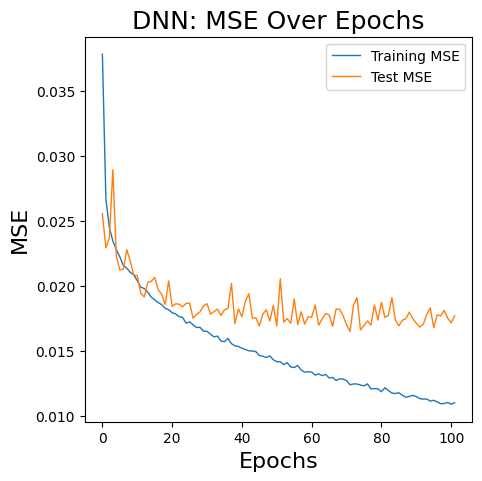

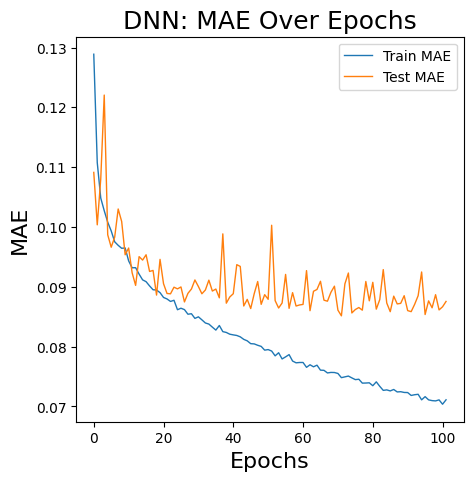

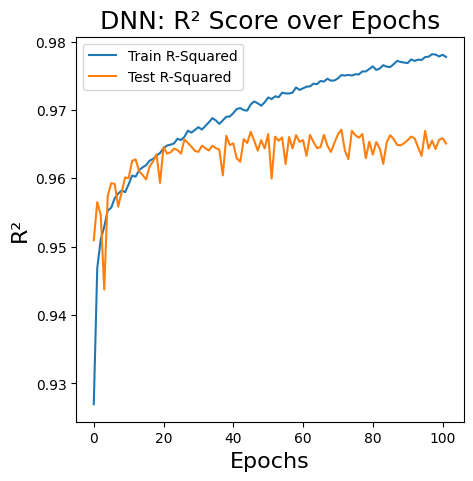

In [28]:
# MSE over Epochs
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label='Training MSE',lw = 1,)
plt.plot(history.history['val_loss'], label='Test MSE', lw = 1,)
plt.title('DNN: MSE Over Epochs', fontsize=18)
plt.ylabel('MSE', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.legend()
plt.show()

# MAE over Epochs
plt.figure(figsize=(5, 5))
plt.plot(history.history['mean_absolute_error'], label='Train MAE', lw=1)
plt.plot(history.history['val_mean_absolute_error'], label='Test MAE', lw=1)
plt.title('DNN: MAE Over Epochs', fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('MAE', fontsize=16)
plt.legend()
plt.grid(False)
plt.show()

# R-Squared over Epochs
plt.figure(figsize=(5, 5))
plt.plot(history.history['coeff_determination'], label='Train R-Squared')
plt.plot(history.history['val_coeff_determination'], label='Test R-Squared')
plt.title('DNN: R² Score over Epochs', fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('R²', fontsize=16)
plt.legend()
plt.grid(False)
plt.show()

#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

n_estimators_list = list(range(10, 201, 10))
train_mse_rf, test_mse_rf = [], []
train_mae_rf, test_mae_rf = [], []
train_r2_rf, test_r2_rf = [], []

for n in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    train_mse_rf.append(mean_squared_error(y_train, y_train_pred))
    test_mse_rf.append(mean_squared_error(y_test, y_test_pred))
    
    train_mae_rf.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_rf.append(mean_absolute_error(y_test, y_test_pred))
    
    train_r2_rf.append(r2_score(y_train, y_train_pred))
    test_r2_rf.append(r2_score(y_test, y_test_pred))


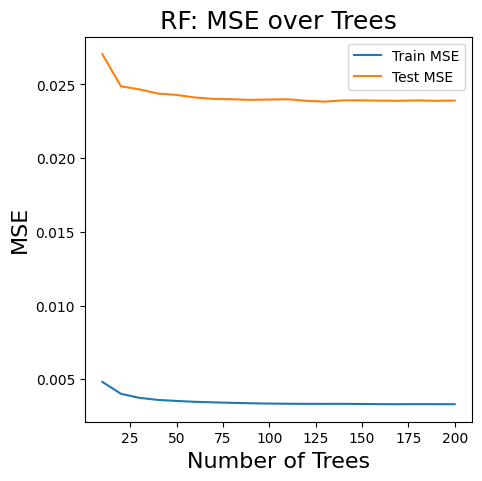

In [78]:
# Plotting
plt.figure(figsize=(5,5))
plt.plot(n_estimators_list, train_mse_rf, label="Train MSE")
plt.plot(n_estimators_list, test_mse_rf, label="Test MSE")
plt.xlabel("Number of Trees",fontsize=16)
plt.ylabel("MSE",fontsize=16)
plt.title("RF: MSE over Trees",fontsize=18)
plt.legend()

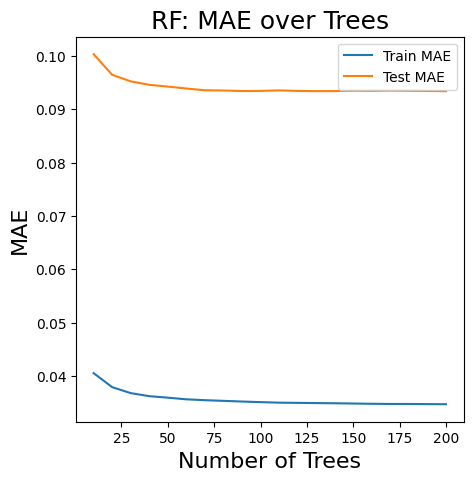

In [30]:
plt.figure(figsize=(5,5))
plt.plot(n_estimators_list, train_mae_rf, label="Train MAE")
plt.plot(n_estimators_list, test_mae_rf, label="Test MAE")
plt.xlabel("Number of Trees",fontsize=16)
plt.ylabel("MAE",fontsize=16)
plt.title("RF: MAE over Trees",fontsize=18)
plt.legend()

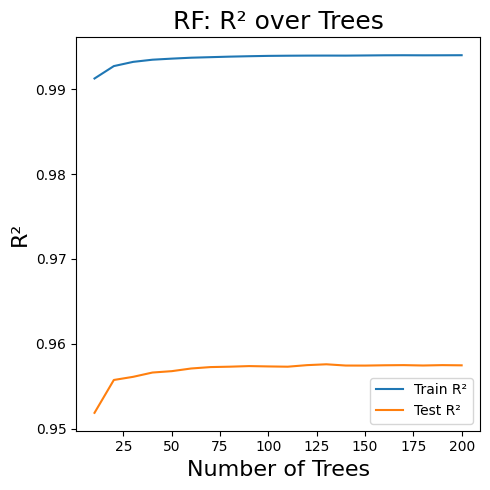

In [31]:
plt.figure(figsize=(5, 5))
plt.plot(n_estimators_list, train_r2_rf, label="Train R²")
plt.plot(n_estimators_list, test_r2_rf, label="Test R²")
plt.xlabel("Number of Trees",fontsize=16)
plt.ylabel("R²",fontsize=16)
plt.title("RF: R² over Trees",fontsize=18)
plt.legend()

plt.tight_layout()
plt.show()

#### Gradient Boosting Regression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

n_estimators_list = list(range(10, 201, 10))
train_mse_gb, test_mse_gb = [], []
train_mae_gb, test_mae_gb = [], []
train_r2_gb, test_r2_gb = [], []

for n in n_estimators_list:
    gb = GradientBoostingRegressor(n_estimators=n, random_state=42)
    gb.fit(X_train, y_train)          # y_train is 1D (e.g., a Series)

    y_train_pred = gb.predict(X_train)
    y_test_pred  = gb.predict(X_test)

    train_mse_gb.append(mean_squared_error(y_train, y_train_pred))
    test_mse_gb.append(mean_squared_error(y_test, y_test_pred))
    train_mae_gb.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_gb.append(mean_absolute_error(y_test, y_test_pred))
    train_r2_gb.append(r2_score(y_train, y_train_pred))
    test_r2_gb.append(r2_score(y_test, y_test_pred))



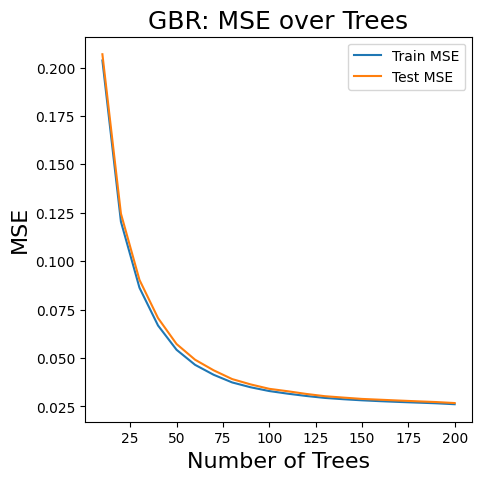

In [33]:
# Plotting
plt.figure(figsize=(5, 5))
plt.plot(n_estimators_list, train_mse_gb, label="Train MSE")
plt.plot(n_estimators_list, test_mse_gb, label="Test MSE")
plt.xlabel("Number of Trees",fontsize=16)
plt.ylabel("MSE",fontsize=16)
plt.title("GBR: MSE over Trees",fontsize=18)
plt.legend()
plt.show()

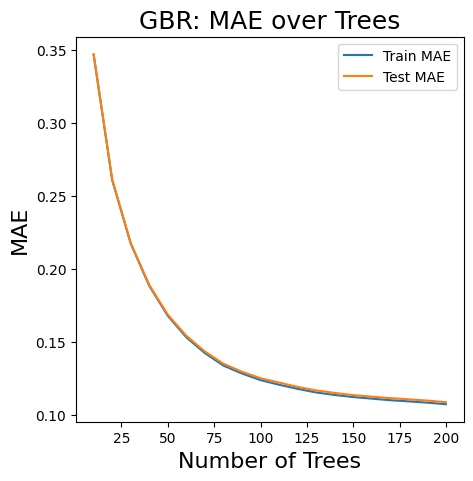

In [34]:
plt.figure(figsize=(5, 5))
plt.plot(n_estimators_list, train_mae_gb, label="Train MAE")
plt.plot(n_estimators_list, test_mae_gb, label="Test MAE")
plt.xlabel("Number of Trees",fontsize=16)
plt.ylabel("MAE",fontsize=16)
plt.title("GBR: MAE over Trees",fontsize=18)
plt.legend()
plt.show()


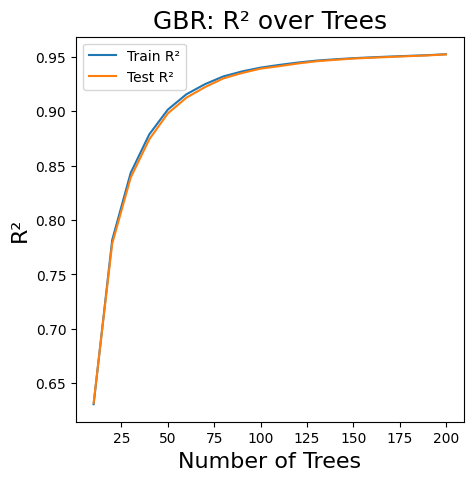

In [35]:
plt.figure(figsize=(5, 5))
plt.plot(n_estimators_list, train_r2_gb, label="Train R²")
plt.plot(n_estimators_list, test_r2_gb, label="Test R²")
plt.xlabel("Number of Trees",fontsize=16)
plt.ylabel("R²",fontsize=16)
plt.title("GBR: R² over Trees",fontsize=18)
plt.legend()
plt.show()

# 7. Plot: Predicted vs True Values

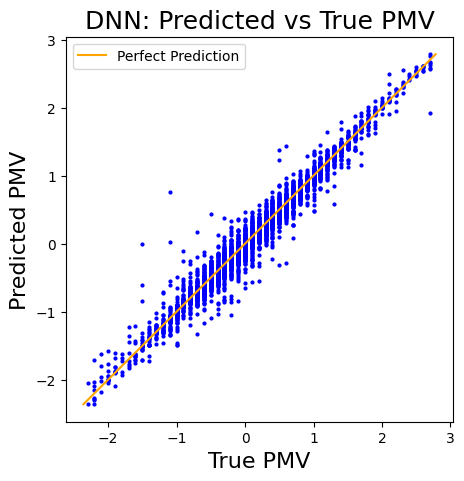

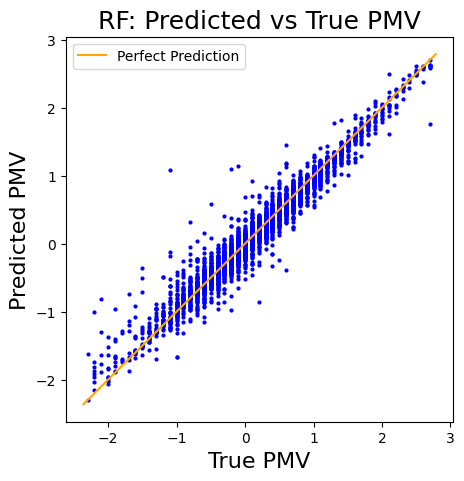

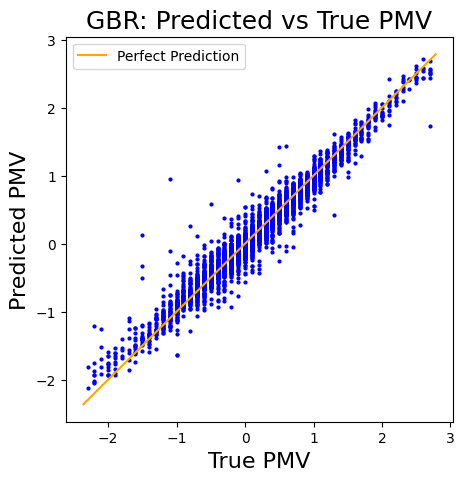

In [36]:
import matplotlib.pyplot as plt

# Common min and max for the perfect prediction line
pmv_min = min(
    y_test.values.min(),
    y_pred_test_dnn.min(),
    y_pred_test_rf.min(),
    y_pred_test_gb.min(),
)

pmv_max = max(
    y_test.values.max(),
    y_pred_test_dnn.max(),
    y_pred_test_rf.max(),
    y_pred_test_gb.max(),
)
# Plot for DNN
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_test_dnn, s=4, color='blue')
plt.plot([pmv_min, pmv_max], [pmv_min, pmv_max], color='orange', label="Perfect Prediction")
plt.title("DNN: Predicted vs True PMV", fontsize=18)
plt.xlabel("True PMV", fontsize=16)
plt.ylabel("Predicted PMV", fontsize=16)
plt.legend()
plt.grid(False)
plt.show()

# Plot for Random Forest
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_test_rf, s=4, color='blue')
plt.plot([pmv_min, pmv_max], [pmv_min, pmv_max], color='orange', label="Perfect Prediction")
plt.title("RF: Predicted vs True PMV", fontsize=18)
plt.xlabel("True PMV", fontsize=16)
plt.ylabel("Predicted PMV", fontsize=16)
plt.legend()
plt.grid(False)
plt.show()

# Plot for Gradient Boosting
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_test_gb, s=4, color='blue')
plt.plot([pmv_min, pmv_max], [pmv_min, pmv_max], color='orange', label="Perfect Prediction")
plt.title("GBR: Predicted vs True PMV", fontsize=18)
plt.xlabel("True PMV", fontsize=16)
plt.ylabel("Predicted PMV", fontsize=16)
plt.legend()
plt.grid(False)
plt.show()



# 8. Feature Importance

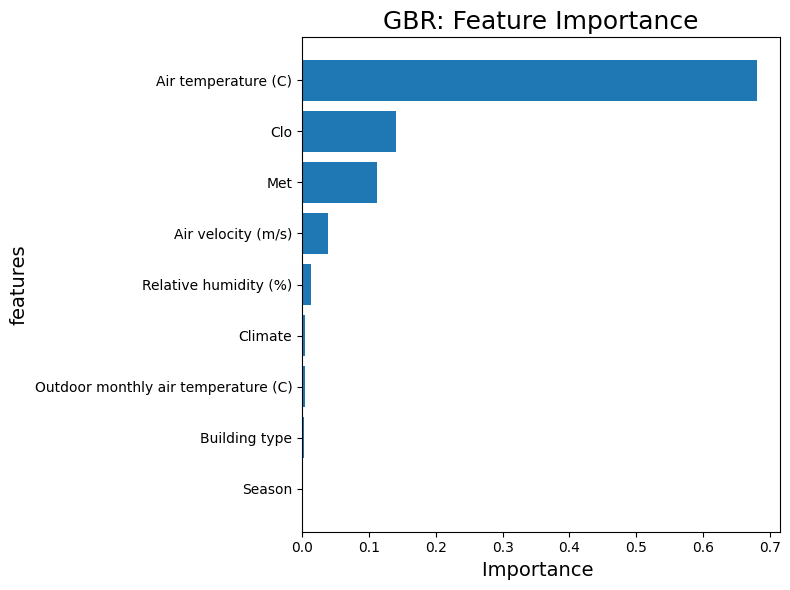

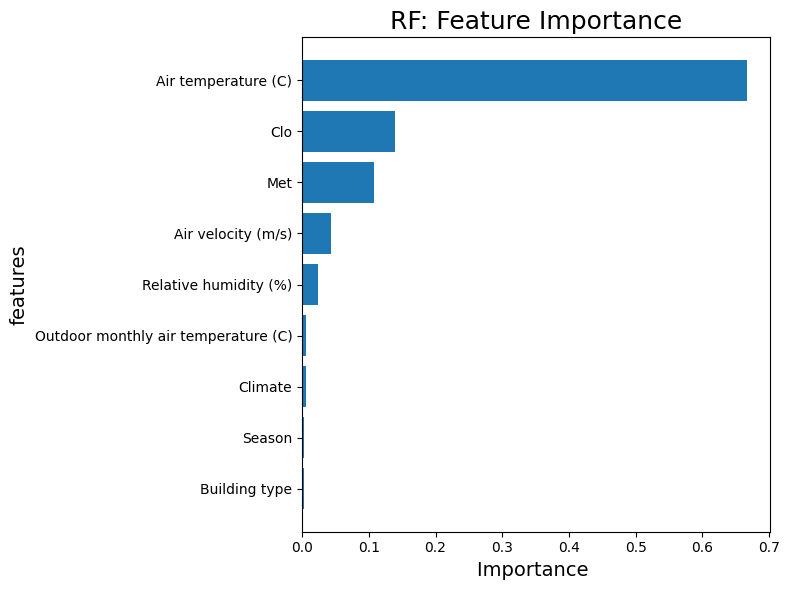

Calculating Permutation Importance for DNN...
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
 22/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 14/139 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 35/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 23/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 25/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 25/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 22/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 23/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 25/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 23/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
 28/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
 31/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 34/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 28/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 31/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 35/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
 29/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 33/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
 30/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 35/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 28/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 28/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 33/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 33/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 34/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 24/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 29/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 57/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 58/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 30/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 28/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 28/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 30/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 28/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 27/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 30/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 31/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 34/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 51/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 29/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 65/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 32/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 28/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 31/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 28/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 31/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 57/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 25/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 25/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
 29/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 31/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 31/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 31/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 26/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
 22/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 15/139 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
 57/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 27/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 50/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 30/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 29/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 24/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 25/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  1/139 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step

c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


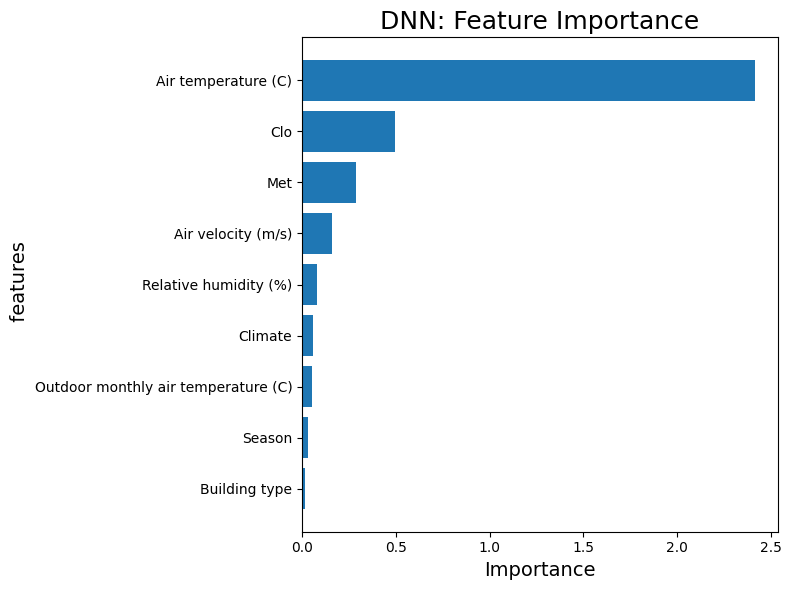

In [37]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance


# ---------- Helpers -------------------------------------------------
def find_ct_in_estimator(est):
    """Find a ColumnTransformer inside an estimator/pipeline (search 1 level deep)."""
    if isinstance(est, ColumnTransformer):
        return est
    if isinstance(est, Pipeline):
        for _, step in est.named_steps.items():
            if isinstance(step, ColumnTransformer):
                return step
            if isinstance(step, Pipeline):
                for __, sub in step.named_steps.items():
                    if isinstance(sub, ColumnTransformer):
                        return sub
    return None

def get_ct_and_feature_names(est, X_fit_df, preprocessor_fallback=None):
    """
    Return (ct, transformed_feature_names) where ct is the ColumnTransformer used.
    If not found in `est`, try `preprocessor_fallback`.
    """
    ct = find_ct_in_estimator(est)
    if ct is None and isinstance(preprocessor_fallback, ColumnTransformer):
        ct = preprocessor_fallback

    if ct is None:
        raise RuntimeError(
            "Couldn't find a fitted ColumnTransformer in your model or as `preprocessor`.\n"
            "If your models are not Pipelines, please provide the fitted `preprocessor` used for training."
        )

    # ensure fitted and get names
    try:
        trans_names = ct.get_feature_names_out(X_fit_df.columns)
    except Exception:
        # If not fitted yet, fit on X_train_raw just to get consistent names/order
        # (Note: best is to reuse the *already* fitted preprocessor from training.)
        ct.fit(X_fit_df)
        trans_names = ct.get_feature_names_out(X_fit_df.columns)

    return ct, np.array(trans_names)

def to_raw_name(transformed_name):
    """
    Map transformed names like 'num__Clo' or 'cat__Season_Autumn' back to raw columns.
    Assumes your ColumnTransformer step names include 'num' for numeric and 'cat' for categoricals.
    Adjust if your step names differ.
    """
    if "__" in transformed_name:
        block, rest = transformed_name.split("__", 1)
        # one-hot categorical: 'cat__Season_Autumn' -> 'Season'
        if block.startswith("cat"):
            return rest.split("_", 1)[0]
        # numeric block (scaled, etc.): 'num__Clo' -> 'Clo'
        return rest
    return transformed_name

def aggregate_tree_importances_to_raw(est, X_train_df, preprocessor_fallback=None, title=""):
    """
    For tree models with feature_importances_ computed in transformed space,
    aggregate back to original raw columns by summing importances of all one-hot children.
    """
    # final estimator (last step if Pipeline)
    final_est = est.steps[-1][1] if isinstance(est, Pipeline) else est
    importances = getattr(final_est, "feature_importances_", None)
    if importances is None:
        raise RuntimeError(f"{title}: Model doesn't expose feature_importances_.")

    # get transformed names (need the exact ColumnTransformer used)
    _, trans_names = get_ct_and_feature_names(est, X_train_df, preprocessor_fallback)

    if len(importances) != len(trans_names):
        raise RuntimeError(
            f"{title}: Length mismatch: importances({len(importances)}) vs transformed names({len(trans_names)}). "
            "Ensure you're using the SAME preprocessor instance that was used during training."
        )

    raw_keys = [to_raw_name(tn) for tn in trans_names]
    df_imp = pd.DataFrame({"raw_feature": raw_keys, "importance": importances})
    agg = df_imp.groupby("raw_feature", as_index=True)["importance"].sum().sort_values(ascending=True)
    return agg

def ensure_pipeline_for_perm(est, preprocessor_fallback=None):
    """
    Ensure `est` can accept RAW DataFrames for permutation_importance.
    - If `est` already a Pipeline that consumes raw, return it.
    - Else, if a fitted ColumnTransformer is provided, wrap as Pipeline(prep -> est).
      IMPORTANT: Use the SAME fitted preprocessor used during training.
    """
    if isinstance(est, Pipeline):
        # if it already has a ColumnTransformer, we’re good
        if find_ct_in_estimator(est) is not None:
            return est
        # it's a pipeline but without CT; still fine if it accepts raw (rare).
        return est

    # Bare estimator (trained on transformed arrays):
    if isinstance(preprocessor_fallback, ColumnTransformer):
        return Pipeline([("prep", preprocessor_fallback), ("model", est)])

    # No safe way to accept raw features
    return None

def plot_series_hbar(s, title, xlabel="Importance", ylabel="Features"):
    plt.figure(figsize=(8, max(6, 0.35 * len(s))))
    plt.barh(s.index, s.values)
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.tight_layout()
    plt.show()


# ---------- Preconditions & common inputs ---------------------------
if not isinstance(X_train_raw, pd.DataFrame):
    raise RuntimeError("X_train_raw must be a pandas DataFrame with your original input columns.")
if isinstance(X_test_raw, pd.DataFrame):
    X_raw_df_test = X_test_raw
elif 'X_test' in globals() and isinstance(X_test, pd.DataFrame):
    X_raw_df_test = X_test
else:
    raise RuntimeError("Provide X_test_raw (or X_test) as a DataFrame of original input columns.")


# ---------- 1) GBR: aggregate to original inputs -------------------
gbr_agg = aggregate_tree_importances_to_raw(
    loaded_gb, X_train_raw, preprocessor_fallback=globals().get("preprocessor", None),
    title="GBR"
)
plot_series_hbar(gbr_agg, "GBR: Feature Importance",
                 xlabel="Importance ", ylabel="features")

# ---------- 2) RF: aggregate to original inputs --------------------
rf_agg = aggregate_tree_importances_to_raw(
    loaded_rf, X_train_raw, preprocessor_fallback=globals().get("preprocessor", None),
    title="RF"
)
plot_series_hbar(rf_agg, "RF: Feature Importance",
                 xlabel="Importance ", ylabel="features")


# ---------- 3) DNN: permutation importance on RAW inputs -----------
# Make sure the estimator accepts raw features (wrap if needed with the SAME fitted preprocessor)
dnn_for_perm = ensure_pipeline_for_perm(
    loaded_dnn, preprocessor_fallback=globals().get("preprocessor", None)
)
if dnn_for_perm is None:
    raise RuntimeError(
        "DNN: Can't run permutation_importance on raw inputs.\n"
        "Wrap your trained DNN with the SAME fitted `preprocessor` used in training, "
        "e.g., Pipeline([('prep', preprocessor), ('dnn', loaded_dnn)])"
    )

print("Calculating Permutation Importance for DNN...")
dnn_perm = permutation_importance(
    dnn_for_perm, X_raw_df_test, y_test, n_repeats=10, random_state=0, scoring="r2"
)
dnn_importances = pd.Series(dnn_perm.importances_mean, index=X_raw_df_test.columns).sort_values(ascending=True)
plot_series_hbar(dnn_importances, "DNN: Feature Importance",
                 xlabel="Importance", ylabel=" features")


